In [ ]:
# Use the Google Colab tools to connect to Google Drive. If you're running this notebook locally, you should download your `.h5` model and point `MODEL_PATH` 

'My Drive'


In [ ]:
import tensorflow as tf

In [ ]:
# The path to the .h5 checkpoint that was saved after the training loop:
MODEL_PATH = '/content/drive/My Drive/DigitalFutures Workshop/Pix2Pix Trained Models/generator_model_002_epochs_200.h5'

# Location of the image you want to test with. The images should be an RGB .png or .jpg file, scaled to 256x256 pixels
INPUT_IMAGE_PATH = 'input.png'

In [ ]:
model = tf.keras.models.load_model(MODEL_PATH)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 128, 128, 64) 3072        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 64, 64, 128)  131584      sequential_2[0][0]               
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 32, 32, 256)  525312      sequential_3[0][0]               
______________________________________________________________________________________________

In [ ]:
img = tf.io.read_file(INPUT_IMAGE_PATH)
img = tf.io.decode_png(img, channels=3)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, (256, 256), antialias=True)
img.shape

TensorShape([256, 256, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


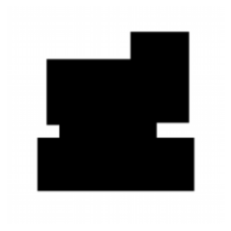

In [ ]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
input_image = tf.expand_dims(img, axis=[0])
input_image.shape

TensorShape([1, 256, 256, 3])

In [ ]:
# prediction = model.predict(input_image)
prediction = model(input_image, training=True)
prediction

<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[0.99819094, 0.9999379 , 0.9987181 ],
         [0.999788  , 1.        , 0.9998522 ],
         [0.9997387 , 1.        , 0.9997514 ],
         ...,
         [0.9971626 , 1.        , 0.99997663],
         [0.9973935 , 1.        , 0.9999661 ],
         [0.99519616, 0.9999978 , 0.9991153 ]],

        [[0.99912995, 0.9999997 , 0.99962085],
         [0.99998754, 1.        , 0.9999959 ],
         [0.9999906 , 1.        , 0.9999816 ],
         ...,
         [0.999383  , 1.        , 0.99999964],
         [0.9997654 , 1.        , 0.99999934],
         [0.9985647 , 1.        , 0.9999164 ]],

        [[0.99948007, 1.        , 0.99931943],
         [0.9999933 , 1.        , 0.9999777 ],
         [0.99998724, 1.        , 0.99994934],
         ...,
         [0.9993762 , 1.        , 0.9999982 ],
         [0.99925053, 1.        , 0.9999958 ],
         [0.99795   , 1.        , 0.9995894 ]],

        ...,

        [[0.9976313 , 1.        , 

In [ ]:
prediction.shape

TensorShape([1, 256, 256, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


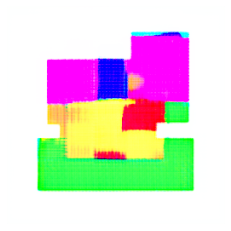

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(prediction[0, :, :, :])
plt.axis('off')
plt.show()